# Logistic Regression: Fashion-MNIST

## Diferencias entre SGDClassifier() y LogisticRegression() 

https://towardsdatascience.com/how-to-make-sgd-classifier-perform-as-well-as-logistic-regression-using-parfit-cc10bca2d3c4

El stochastic gradient descent se utiliza cuando se tienen set de datos largos, en este caso al final se tienen 60 mil filas de datos con 784 columnas, que, para los equipos con los que cuentan los miembros del grupo de trabajo resulta ser la mejor opción, pues no se trabaja con la totalidad de los datos.

### Cargando las librerías necesarias

Para este caso el dataset Fashion-MNIST se obtiene de la biblioteca TensorFlow, importando la librería keras. También se cargaron las bibliotecas numpy y matplotlib.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

La versión de tensor flow utilizada es la siguiente:

In [2]:
print('Version de tensor flow: ', tf.__version__)

Version de tensor flow:  2.3.0


### Creando el dataset Fashion-MNIST

Los datos se cargaron como un módulo, el cual se nombró como _"fashion_data"_.

In [3]:
fashion_data = keras.datasets.fashion_mnist

In [4]:
type(fashion_data)

module

### Obtención de los datos para entrenamiento y test

Los datos para entrenamiento y el testeo se obtuvieron a partir del módulo _"fashion_data"_ y se nombraron de la siguiente manera:

``X_train``: Features de entrenamiento

``X_test``: Features para el test

``y_train``: Targets para el entrenamiento

``y_test``: Targets para el test

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_data.load_data()

Las etiquetas de las clases utilizadas se presentan en la variable _"class_names"_, correspondiendo cada una a los números del 0 al 9 en orden.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explorando los sets de datos

Mostrando la forma de las variables definidas para el entrenamiento y el test se tiene lo siguiente:

Los features para el entrenamiento tienen la forma (60000, 28, 28), lo que indica que es una matriz de 3 dimenciones, con un total de 60,000 datos representando imágenes de 28 por 28 pixeles.

In [7]:
X_train.shape

(60000, 28, 28)

Los target para el entrenamiento ``y_train`` tienen una longitud (cantidad de datos/filas) de 60,000 correspondiendo a las etiquetas (0-9) que definen a cada imágen.

In [8]:
len(y_train)

60000

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Los features para el test tienen la forma (10000, 28, 28), que indica un total de 10000 imágenes de 28 por 28 pixeles.

In [10]:
X_test.shape

(10000, 28, 28)

Mientras que los targets para el test tienen un total de 10000 datos, que igualmente representan las etiquetas del tipo de prenda de vestir.

In [11]:
len(y_test)

10000

In [12]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

#### Graficando los datos

Los datos deben procesarse antes de introducirlos al modelo de regresión logistica, para una primera visualización de estos se presenta la imágen 4 del set de features para el entrenamiento, este es un vestido, cuya etiqueta como string es "Dress" y 3 como entero. Los datos se encuentran en un rango de 0 a 255, que representan las tonalidades.

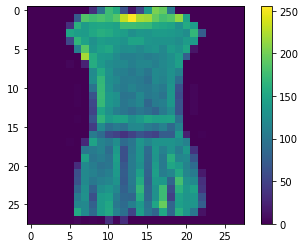

In [13]:
plt.figure()
plt.imshow(X_train[3]) # Para graficar la imágen
plt.colorbar() # Insertar la barra de color (0-255)
plt.grid(False) # Ignorando el grid
plt.show() 

Ya que los valores se encuentran en un rango de 0 a 255, estos se reescaloron entre 0 y 1, dividiendo las matrices de features entre 255.

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Se grafican las primeras 30 imágenes en escala de grises (cmap binary) para visualizar las imágenes ya reescaladas entre 0 y 1, como etiqueta en el eje x se presentan las etiquetas representativas de cada tipo de prenda de vestir.

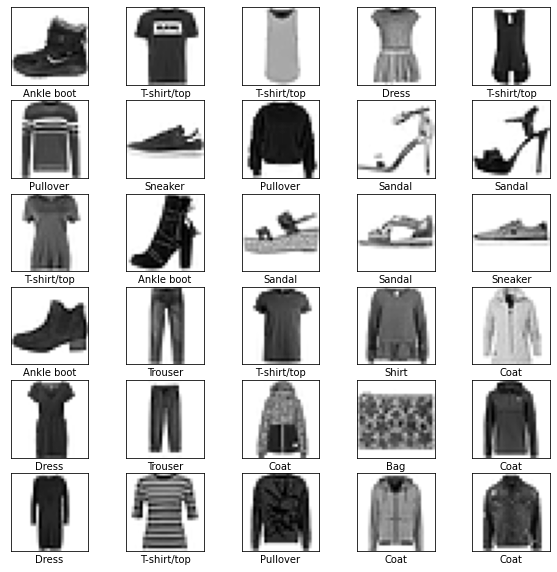

In [15]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1) # 30 celdas (6 x 5), con i+1 representando la posición de la nueva imágen.
    plt.xticks([]) # Se omiten las coordenadas de los ejes
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary) # Con el cmap se establece el mapa de colores, en este caso es binario (escala de grises)
    plt.xlabel(class_names[y_train[i]]) # Se insertan las etiquetas de los nombres de cada prenda
plt.show()

Ya que el tipo de datos de los target son enteros no es necesario realizar alguna conversión (como en el caso de que sean strings).

In [16]:
type(y_train[0])

numpy.uint8

#### Convirtiendo la matriz 3d a 2d

Para introducir el set de datos de entranamiento utilizando la librería sklearn se necesita que estos se encuentren en matrices de dos dimenciones, ya que se tienen matrices de tres dimenciones a continuación se presenta la conversión de 3D a 2D, a través de la función ``reshape()`` de numpy (se utiliza una tupla para introducir la nueva forma del arreglo), donde se tienen __n__ filas representadas con la función ``len(X)`` y 784 columnas, que representan los pixeles de las imágenes (28 x 28).

In [17]:
X_train = X_train.reshape((len(X_train), 784))
X_test = X_test.reshape((len(X_test), 784))

In [27]:
type(X_train)

numpy.ndarray

### Modelo con Sklearn

In [18]:
from sklearn.linear_model import SGDClassifier

In [22]:
model_SGD = SGDClassifier(loss = 'log', random_state=42, max_iter=1500)

In [23]:
model_SGD.fit(X = X_train, y = y_train)

SGDClassifier(loss='log', max_iter=1500, random_state=42)

__Predicción en base al modelo generado y los datos seleccionados para el test__

In [28]:
y_predict = model_SGD.predict(X_test)

In [29]:
y_predict

array([9, 2, 1, ..., 6, 1, 5], dtype=uint8)

In [30]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test, y_predict)

array([[741,   1,  25,  54,   6,   4, 156,   0,  13,   0],
       [  3, 951,   5,  28,   6,   0,   4,   1,   2,   0],
       [ 12,   4, 728,  10, 142,   0,  92,   1,  11,   0],
       [ 15,   9,  14, 877,  31,   0,  50,   0,   4,   0],
       [  0,   1, 106,  38, 750,   0,  95,   0,  10,   0],
       [  1,   0,   0,   2,   0, 917,   0,  51,  12,  17],
       [101,   1, 127,  47,  94,   1, 599,   0,  30,   0],
       [  0,   0,   0,   0,   0,  37,   0, 933,   1,  29],
       [  3,   1,   7,  11,   1,   7,  15,   4, 951,   0],
       [  0,   0,   0,   1,   0,  34,   1,  48,   0, 916]], dtype=int64)

In [37]:
confusion_matrix(y_test, y_test)

array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1000,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1000,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1000,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1000]],
      dtype=int64)

In [39]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [40]:
precision_score(y_test, y_predict, average = None)

array([0.84589041, 0.98243802, 0.71936759, 0.82116105, 0.72815534,
       0.917     , 0.59189723, 0.89884393, 0.91972921, 0.95218295])

In [41]:
recall_score(y_test, y_predict, average = None)

array([0.741, 0.951, 0.728, 0.877, 0.75 , 0.917, 0.599, 0.933, 0.951,
       0.916])

In [42]:
f1_score(y_test, y_predict, average = None)

array([0.78997868, 0.96646341, 0.72365805, 0.84816248, 0.73891626,
       0.917     , 0.59542744, 0.91560353, 0.93510324, 0.93374108])

__Cross Value__

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
cross_val_score(model_SGD, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.8424 , 0.8456 , 0.83865])

In [33]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [34]:
y_cross_predict = cross_val_predict(model_SGD, X_train, y_train, cv = 3)

In [81]:
confusion_matrix(y_train, y_cross_predict)

array([[4802,   22,   99,  557,   61,    4,  353,    1,   92,    9],
       [ 114, 5601,   25,  194,   18,    0,   33,    0,    8,    7],
       [ 199,    8, 3760,  146, 1385,    1,  422,    0,   79,    0],
       [ 403,   52,   30, 5159,  211,    2,   78,    3,   55,    7],
       [  74,    6,  260,  376, 4918,    0,  317,    0,   47,    2],
       [  16,    6,   10,   17,    6, 5051,   13,  352,  127,  402],
       [1201,   13,  552,  456, 1232,    1, 2357,    1,  184,    3],
       [   2,    0,    0,    2,    0,  120,    0, 5290,   28,  558],
       [  50,    1,   24,  118,   54,   32,   89,   25, 5594,   13],
       [   7,    0,    1,    1,    3,   68,    2,  139,   14, 5765]],
      dtype=int64)

In [82]:
confusion_matrix(y_train, y_train)

array([[6000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 6000,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 6000,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 6000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 6000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6000,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 6000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 6000]],
      dtype=int64)

In [83]:
from sklearn.metrics import precision_score, recall_score

In [88]:
precision_score(y_train, y_cross_predict, average = None)

array([0.69918462, 0.9810825 , 0.78975005, 0.7342727 , 0.6234787 ,
       0.95681   , 0.64328603, 0.91034245, 0.89820167, 0.85205439])

In [90]:
recall_score(y_train, y_cross_predict, average = None)

array([0.80033333, 0.9335    , 0.62666667, 0.85983333, 0.81966667,
       0.84183333, 0.39283333, 0.88166667, 0.93233333, 0.96083333])

In [91]:
from sklearn.metrics import f1_score

In [93]:
f1_score(y_train, y_cross_predict, average = None)

array([0.74634753, 0.95669997, 0.69881981, 0.79210809, 0.70823733,
       0.89564678, 0.48778974, 0.89577512, 0.9149493 , 0.90318032])

__Curvas__

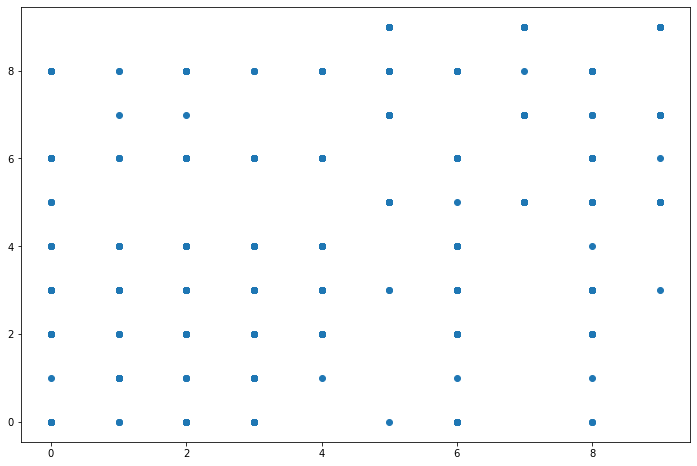

In [22]:
plt.figure(figsize = (12, 8))
plt.scatter(y_test, y_predict)
plt.show()

In [27]:
import pandas as pd

In [29]:
df = pd.DataFrame({'y_test': y_test, 'y_predict': y_predict})